In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Part 2.1: MNIST Dataset Processing
import torch
import torchvision
import torchvision.transforms as transforms
from einops import rearrange
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# Step 1: Download and subset the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)

In [3]:
# Create a subset of 1,000 samples
subset_size = 1000
subset_indices = torch.randperm(len(mnist))[:subset_size]
subset_mnist = [mnist[i] for i in subset_indices]

In [4]:
# Extract images and labels
images = torch.stack([img for img, label in subset_mnist])  # Shape: [1000, 1, 28, 28]
labels = torch.tensor([label for _, label in subset_mnist])

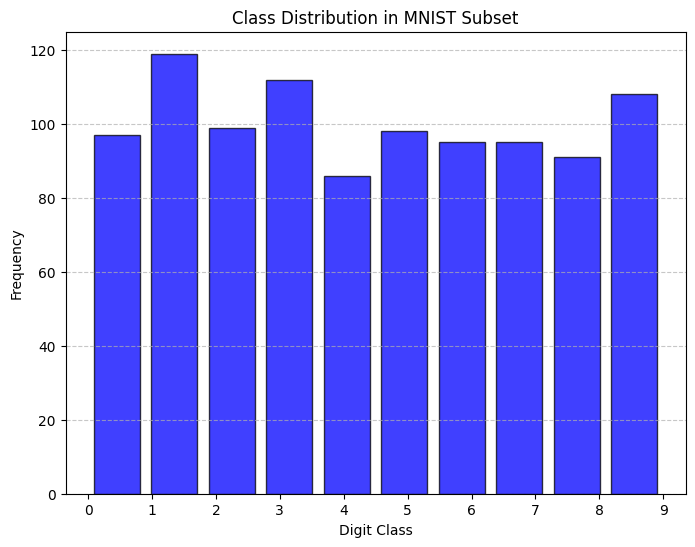

In [5]:
# Step 2: Plot Histogram of Classes
plt.figure(figsize=(8,6))
plt.hist(labels.numpy(), bins=10, rwidth=0.8, alpha=0.75, color='blue', edgecolor='black')
plt.xlabel("Digit Class")
plt.ylabel("Frequency")
plt.title("Class Distribution in MNIST Subset")
plt.xticks(range(10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
# Step 3: Batch using einops
batched_images = rearrange(images, "(b n) c h w -> b n c h w", n=25)  # Reshape to [num_batches, 25, 1, 28, 28]

In [7]:
# Step 4: Plot an MNIST image in 3D
random_index = np.random.randint(0, subset_size)
image_3d = images[random_index, 0].numpy()  # Convert tensor to numpy
x = np.arange(28)
y = np.arange(28)
X, Y = np.meshgrid(x, y)
Z = image_3d

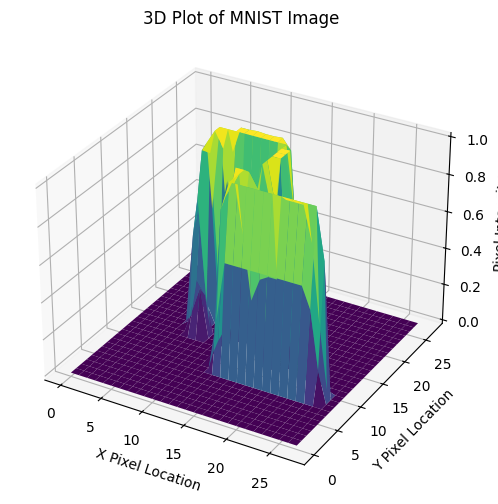

In [8]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel("X Pixel Location")
ax.set_ylabel("Y Pixel Location")
ax.set_zlabel("Pixel Intensity")
ax.set_title("3D Plot of MNIST Image")
plt.show()

In [9]:
# Part 2.2: Energy Consumption Analysis
file_path = "energydata_complete.csv"
df = pd.read_csv(file_path)

# Convert timestamp column to datetime format
df["date"] = pd.to_datetime(df["date"])

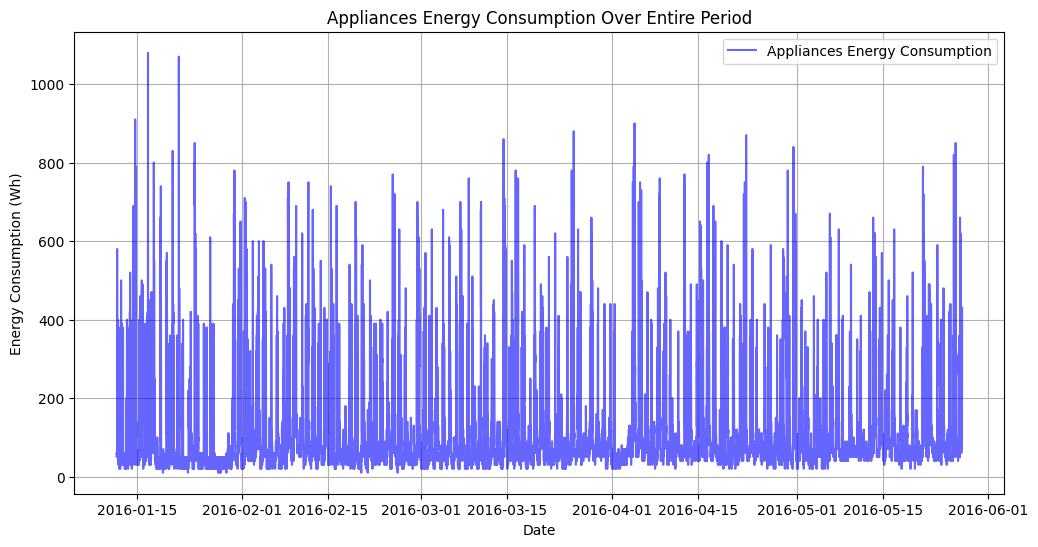

In [10]:
# Step 1: Plot appliances energy consumption over the entire period
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["Appliances"], label="Appliances Energy Consumption", color="blue", alpha=0.6)
plt.xlabel("Date")
plt.ylabel("Energy Consumption (Wh)")
plt.title("Appliances Energy Consumption Over Entire Period")
plt.legend()
plt.grid(True)
plt.show()

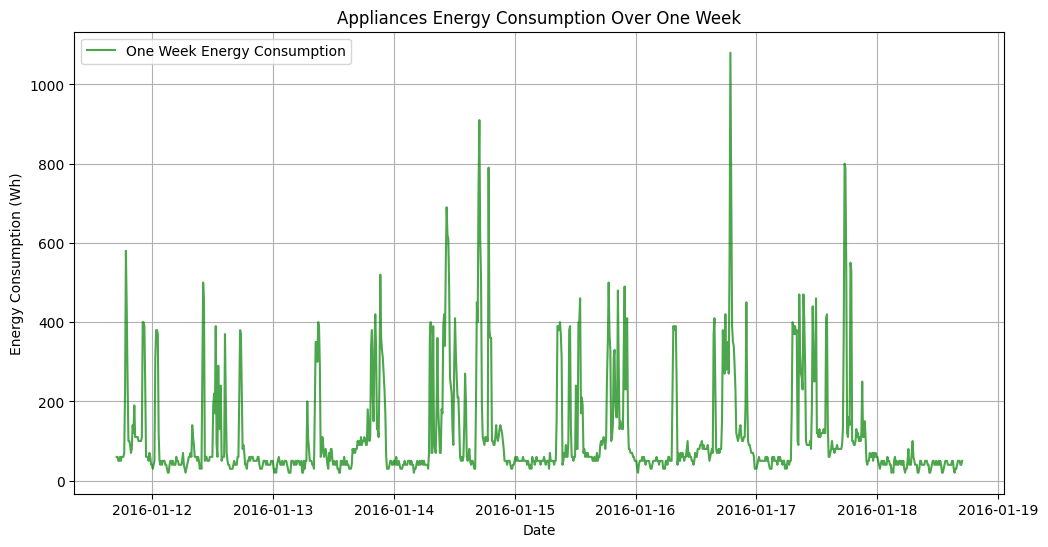

In [13]:
# Extract one week of data
one_week_df = df.loc[(df["date"] >= df["date"].min()) & (df["date"] < df["date"].min() + pd.Timedelta(weeks=1))].copy()

# Plot appliances energy consumption for one week
plt.figure(figsize=(12, 6))
plt.plot(one_week_df["date"], one_week_df["Appliances"], label="One Week Energy Consumption", color="green", alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Energy Consumption (Wh)")
plt.title("Appliances Energy Consumption Over One Week")
plt.legend()
plt.grid(True)
plt.show()

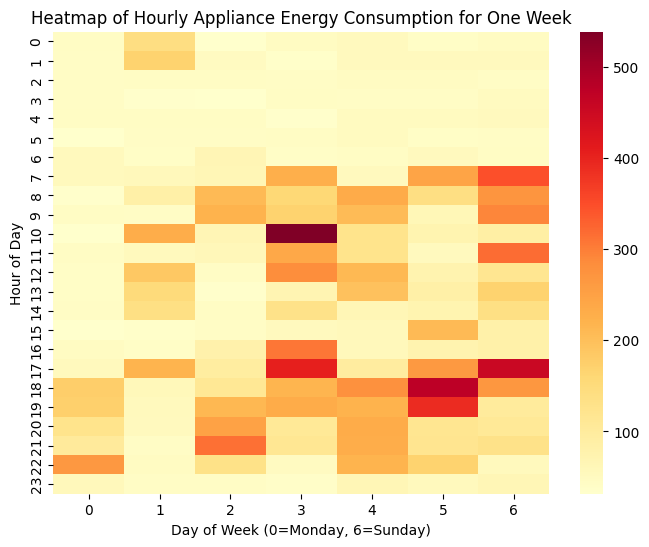

In [14]:
# Step 2: Create heatmap for one week's hourly consumption
one_week_df.loc[:, "hour"] = one_week_df["date"].dt.hour
one_week_df.loc[:, "day_of_week"] = one_week_df["date"].dt.dayofweek

heatmap_data = one_week_df.pivot_table(index="hour", columns="day_of_week", values="Appliances", aggfunc="mean")

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=False)
plt.xlabel("Day of Week (0=Monday, 6=Sunday)")
plt.ylabel("Hour of Day")
plt.title("Heatmap of Hourly Appliance Energy Consumption for One Week")
plt.show()

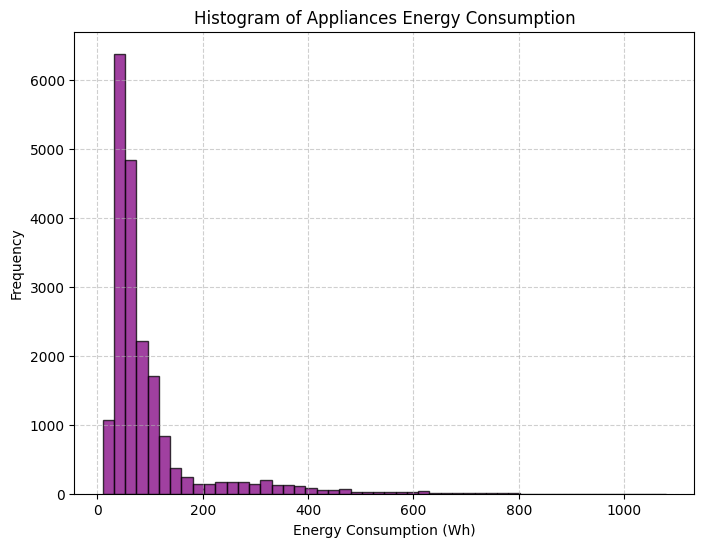

In [15]:
# 3. Plot histogram of energy consumption
plt.figure(figsize=(8, 6))
plt.hist(df["Appliances"], bins=50, color="purple", alpha=0.75, edgecolor="black")
plt.xlabel("Energy Consumption (Wh)")
plt.ylabel("Frequency")
plt.title("Histogram of Appliances Energy Consumption")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

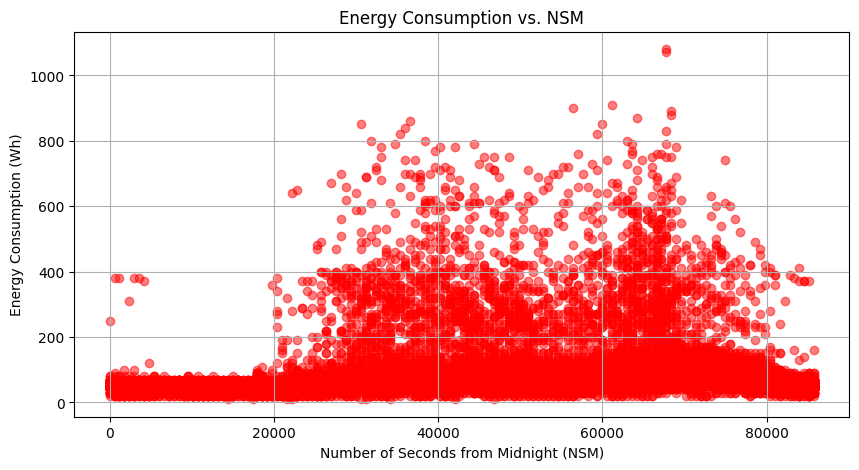

In [16]:
# 4. Construct NSM and plot against energy consumption
df["NSM"] = df["date"].dt.hour * 3600 + df["date"].dt.minute * 60 + df["date"].dt.second

plt.figure(figsize=(10, 5))
plt.scatter(df["NSM"], df["Appliances"], alpha=0.5, color="red")
plt.xlabel("Number of Seconds from Midnight (NSM)")
plt.ylabel("Energy Consumption (Wh)")
plt.title("Energy Consumption vs. NSM")
plt.grid(True)
plt.show()

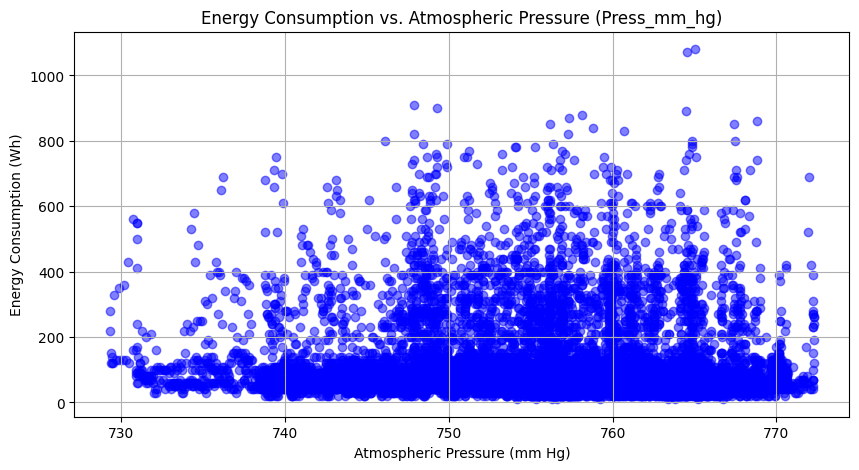

In [17]:
# 5. Plot appliances energy consumption vs. Press_mm_hg
plt.figure(figsize=(10, 5))
plt.scatter(df["Press_mm_hg"], df["Appliances"], alpha=0.5, color="blue")
plt.xlabel("Atmospheric Pressure (mm Hg)")
plt.ylabel("Energy Consumption (Wh)")
plt.title("Energy Consumption vs. Atmospheric Pressure (Press_mm_hg)")
plt.grid(True)
plt.show()

In [18]:
# 6. Comments on major factors for energy consumption: NSM is a major factor showing that time of day is a strongly correlated factor with most energy consumption occuring in the morning and evening and somewhat less consumption mid day and very little in the middle of the night. Atmospheric pressure has a weaker correlation but may slightly impact the use of home appliances.

In [20]:
# Part 2.3: NASA Airfoil Data Analysis
file_path = "airfoil_self_noise.dat"
column_names = ["Frequency_Hz", "Angle_of_Attack_deg", "Chord_Length_m", "Free_Stream_Velocity_mps", "Suction_Side_Displacement_Thickness_m", "Scaled_Sound_Pressure_Level_dB"]
df = pd.read_csv(file_path, sep="\t", names=column_names, engine="python")

In [22]:
# Compute descriptive statistics
statistics = {
    "Mean": df.mean(),
    "Variance": df.var(),
    "Standard Deviation": df.std(),
    "Median": df.median(),
    "Kurtosis": df.apply(stats.kurtosis),
    "Skewness": df.apply(stats.skew),
    "Range": df.max() - df.min()
}

In [24]:
# Convert statistics dictionary to a DataFrame for better visualization
stats_df = pd.DataFrame(statistics)

# Display results
print("Descriptive Statistics:\n", stats_df)

Descriptive Statistics:
                                               Mean      Variance  \
Frequency_Hz                           2886.380572  9.938717e+06   
Angle_of_Attack_deg                       6.782302  3.502424e+01   
Chord_Length_m                            0.136548  8.749868e-03   
Free_Stream_Velocity_mps                 50.860745  2.425116e+02   
Suction_Side_Displacement_Thickness_m     0.011140  1.729287e-04   
Scaled_Sound_Pressure_Level_dB          124.835943  4.759146e+01   

                                       Standard Deviation       Median  \
Frequency_Hz                                  3152.573137  1600.000000   
Angle_of_Attack_deg                              5.918128     5.400000   
Chord_Length_m                                   0.093541     0.101600   
Free_Stream_Velocity_mps                        15.572784    39.600000   
Suction_Side_Displacement_Thickness_m            0.013150     0.004957   
Scaled_Sound_Pressure_Level_dB                   6.898